##### Copyright 2019 The TensorFlow Authors.

# Get started with TensorFlow 2.0 for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/beta/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/r2/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

#### Download and install the TensorFlow 2.0 Beta package. Import TensorFlow into your program:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#### Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0        ## 정수형 데이터를 실수형으로 바꿔줌

11493376/11490434 [==============================] - 1s 0us/step


#### 불러온 데이터를 확인해 본다.

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

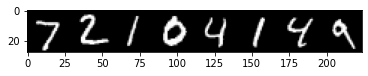

In [5]:
images = x_test[0,:,:]
for i in range(7):
    images = np.concatenate((images, x_test[i+1,:,:]), axis=1)
plt.gray()
plt.imshow(images)

In [6]:
y_train[:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [7]:
28*28

784

#### Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:
https://keras.io/ko/models/model/

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   ## Convert 2D (28x28) data to 1D (28*28 = 784)
  tf.keras.layers.Dense(128, activation='relu'),   ## # of neurons in the first layer = 128 --> First layer weight matrix size = 784 by 128
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')  ## # of neurons in the second layer = 10 = # of classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train and evaluate the model:

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.3926 - accuracy: 0.8838
Epoch 2/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.2185 - accuracy: 0.9360
Epoch 3/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.1815 - accuracy: 0.9460
Epoch 4/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.1620 - accuracy: 0.9513
Epoch 5/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.1476 - accuracy: 0.9562
Epoch 6/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.1397 - accuracy: 0.9572
Epoch 7/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.1306 - accuracy: 0.9597
Epoch 8/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.1270 - accuracy: 0.9613
Epoch 9/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.1190 - accuracy: 0.9623
Epoch 10/10
1875/1875 [==============================] - 1s 797u

In [10]:
perf_test = model.evaluate(x_test, y_test)
perf_train = model.evaluate(x_train, y_train)

print(model.metrics_names)
print(np.round(perf_test,4))
print(np.round(perf_train,4))

1875/1875 [==============================] - 1s 714us/step - loss: 0.0408 - accuracy: 0.9880
['loss', 'accuracy']
[0.0805 0.9775]
[0.0408 0.988 ]


####  The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/beta/tutorials/).

#### 학습된 모델을 이용하여 몇개 테스트 샘플에 대해 분류 수행

In [23]:
metric = model.predict( x_test)
print(metric.shape)

y_pred = np.argmax(metric, axis=1)
print(y_pred[:30])

y_pred2 = model.predict_classes( x_test)
print(y_pred2[:30])

(10000, 10)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [28]:
metric[0,:]

array([7.4426643e-10, 8.6521415e-13, 2.9178714e-06, 5.2003088e-06,
       2.5593418e-15, 2.7083379e-08, 1.5536988e-16, 9.9999177e-01,
       4.9809874e-08, 1.5250151e-07], dtype=float32)

#### 분류(예측) 결과 확인

Predicted labels:  [7 2 1 0 4 1 4 9]


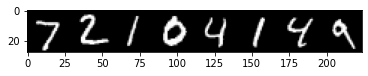

In [33]:
images = x_test[0,:,:]
for i in range(7):
    images = np.concatenate((images, x_test[i+1,:,:]), axis=1)
plt.gray()
plt.imshow(images)
print('Predicted labels: ', y_pred[:8])

#### 분류(예측) 오류 예

Predicted labels:  [8 6 0 7 3 7 0 2]
Original labels:   [9 4 6 2 5 3 6 8]


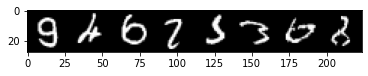

In [34]:
b = y_test != y_pred
y_t_error = y_test[b]
y_p_error = y_pred[b]
x_t_error = x_test[b,:,:]

images = x_t_error[0,:,:]
for i in range(7):
    images = np.concatenate((images, x_t_error[i+1,:,:]), axis=1)
plt.gray()
plt.imshow(images)
print('Predicted labels: ', y_p_error[:8])
print('Original labels:  ', y_t_error[:8])

In [22]:
len(y_pred)

12

#### 학습된 모델을 나중에 사용하려면 저장해둬야 ...

In [14]:
model.save('My_first_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: My_first_model\assets
